In [1]:
!pwd
import sys
print(sys.path)

/content
['/content', '/env/python', '/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/usr/local/lib/python3.12/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.12/dist-packages/IPython/extensions', '/root/.ipython']


In [2]:
!git clone 'https://github.com/successmoon/dreamerv3_final'

Cloning into 'dreamerv3_final'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 178 (delta 16), reused 178 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (178/178), 6.15 MiB | 19.20 MiB/s, done.
Resolving deltas: 100% (16/16), done.


#

#

#

In [1]:
!pip install gdown
import gdown
file_id = '18FTuZ96Mo_UFYcg42l5NBxVOP8EuuVAU'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'model.zip'
gdown.download(url, output, quiet=False)
!unzip model.zip
%cd '/content/dreamerv3_final'
!pip install -U -r requirements.txt
!pip install PyYAML
!pip install ruamel.yaml
!pip install portal
!pip install opensimplex
import sys
sys.path.append('/content/dreamerv3_final')
%cd /content/dreamerv3

Downloading...
From (original): https://drive.google.com/uc?id=18FTuZ96Mo_UFYcg42l5NBxVOP8EuuVAU
From (redirected): https://drive.google.com/uc?id=18FTuZ96Mo_UFYcg42l5NBxVOP8EuuVAU&confirm=t&uuid=1e141264-8b36-4c41-8923-e4a9415f9280
To: /content/model.zip
100%|██████████| 1.87G/1.87G [00:07<00:00, 246MB/s]


Archive:  model.zip
replace agent.pkl? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: agent.pkl               

 extracting: done                    
 extracting: replay.pkl              
  inflating: step.pkl                
/content/dreamerv3_final
  Using cached chex-0.1.91-py3-none-any.whl.metadata (18 kB)
  Using cached optax-0.2.6-py3-none-any.whl.metadata (7.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
INFO: pip is looking at multiple versions of chex to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of optax to determine which version is compatible with other requirements. This could take a while.
[Errno 2] No such file or directory: '/content/dreamerv3'
/content/dreamerv3_final


In [2]:
%cd /content/dreamerv3_final/dreamerv3

/content/dreamerv3_final/dreamerv3


In [ ]:
!pip install transformers

In [3]:
question_dependencies = {
    "Did the last player action succeed? If not, why?": ["What was the last action taken by the player?",],
    "For each object in the list, are the requirements met for interaction?":
        ["List objects in the current observation. For each object, breifly answer what resource it provides and its requirement.", ],
    "List top 3 sub-tasks the player should follow. Indicate their priority out of 5.":
        ["List objects in the current observation. For each object, breifly answer what resource it provides and its requirement.",
        "For each object in the list, are the requirements met for interaction?", ],
    "What are the requirements for the top sub-task? What should the player do first?":
        ["List top 3 sub-tasks the player should follow. Indicate their priority out of 5.", ],
    "List top 5 actions the player should take and the requirement for each action. Choose ONLY from the this list [ noop , move_left , move_right , move_up , move_down , do , sleep,place_stone,place_table,place_furnace,place_plant , make_wood_pickaxe,make_stone_pickaxe , make_iron_pickaxe , make_wood_sword , make_stone_sword , make_iron_sword ] . Indicate their priority out of 5.":
        ["What are the requirements for the top sub-task? What should the player do first?"],
    "For each action in the list, are the requirements met?":
        ["List top 5 actions the player should take and the requirement for each action. Choose ONLY from the this list [ noop , move_left , move_right , move_up , move_down , do , sleep,place_stone,place_table,place_furnace,place_plant , make_wood_pickaxe,make_stone_pickaxe , make_iron_pickaxe , make_wood_sword , make_stone_sword , make_iron_sword ] . Indicate their priority out of 5."],
    'Choose the only one best executable action only from above top 5 actions that met requirements from the list (only exact word and without explanation). list: [ **noop** , **move_left** , **move_right** , **move_up** , **move_down** , **do** , **sleep** , **place_stone** , **place_table** , **place_furnace** , **place_plant** , **make_wood_pickaxe** , **make_stone_pickaxe** , **make_iron_pickaxe** , **make_wood_sword** , **make_stone_sword** , **make_iron_sword** ] with that probability around all other actions in json format. for example: { "action":"move_down" , "probability":0.3 } ':
        ["What was the last action taken by the player?", "Did the last player action succeed? If not, why?",
         "List top 2 actions the player should take and the requirement for each action. Choose ONLY from the this list [ noop , move_left , move_right , move_up , move_down , do , sleep,place_stone,place_table,place_furnace,place_plant , make_wood_pickaxe,make_stone_pickaxe , make_iron_pickaxe , make_wood_sword , make_stone_sword , make_iron_sword ] . Indicate their priority out of 5.", "For each action in the list, are the requirements met?"],
}
q_act = 'Choose the only one best executable action only from above top 5 actions that met requirements from the list (only exact word and without explanation). list: [ **noop** , **move_left** , **move_right** , **move_up** , **move_down** , **do** , **sleep** , **place_stone** , **place_table** , **place_furnace** , **place_plant** , **make_wood_pickaxe** , **make_stone_pickaxe** , **make_iron_pickaxe** , **make_wood_sword** , **make_stone_sword** , **make_iron_sword** ] with that probability around all other actions in json format. for example: { "action":"move_down" , "probability":0.3 } '


In [ ]:
# GEMMA CODES
!pip install -U transformers accelerate bitsandbytes
from transformers import (AutoTokenizer,AutoModelForCausalLM,
                          TextStreamer,pipeline,BitsAndBytesConfig)
import transformers
import torch
import os
hf_token = "hf token"
import os
os.environ["HUGGING_FACE_HUB_TOKEN"] = hf_token
model_id = "google/gemma-3-12b-it" # "google/gemma-7b-it" "google/gemma-2-9b-it"
dtype = torch.bfloat16
tokenizer = AutoTokenizer.from_pretrained(model_id)

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="cuda:1",
    torch_dtype=dtype,
    load_in_4bit=True,
)
def get_inference_gemma(messages, max_new_tokens=256, temperature=0.2, top_p=0.9):

    prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

    inputs = tokenizer.encode(prompt, add_special_tokens=False, return_tensors="pt").to(model.device)
    outputs = model.generate(
        input_ids=inputs,
        max_new_tokens=512,
        do_sample=True,
        temperature=0.7,
        top_p=0.95,
        pad_token_id=tokenizer.eos_token_id
    )
    input_length = inputs.shape[1]  # Get the length of input tokens
    response_tokens = outputs[0][input_length:]  # Take only the new tokens
    response_text = tokenizer.decode(
        response_tokens
        , skip_special_tokens=True)
    return response_text




def match_act(string):
    for i, act in enumerate(action_list):
        if act.lower() in string.lower():
            return i
    print("LLM failed with output \"{}\", taking action Do...".format(string))
    return action_list.index("Do")


def compose_prompt_gemma(CTXT, text_obs, Q_CTXT, question, text):
    messages = []
    tmp_text = f"""
    You’re a player trying to play the game of crafter.
    {CTXT}
    "Most recent two steps of the player's in-game observation:
    {text_obs}
    {text}
    """
    if Q_CTXT and len(Q_CTXT) >= 1:
        tmp_text = tmp_text + Q_CTXT[0][0]
        messages.append({"role": "user", "content": tmp_text})
        messages.append({"role": "assistant", "content": Q_CTXT[0][1]})
        if len(Q_CTXT) == 1:
            print("in question")
            messages.append({"role": "user", "content": question})
    else:
        messages.append({"role": "user", "content": tmp_text + '\n' + question})

    if Q_CTXT and len(Q_CTXT) > 1:
        for q, a in Q_CTXT[1:]:
            messages.append({"role": "user", "content": q})
            messages.append({"role": "assistant", "content": a})

        messages.append({"role": "user", "content": question})

    return messages




def topological_sort_gemma(dependencies):
    def dfs(node):
        if visited[node] == 1:
            raise ValueError("There is a cycle in the dependency graph.")
        if visited[node] == 0:
            visited[node] = 1
            for neighbor in dependencies.get(node, []):
                dfs(neighbor)
            visited[node] = 2
            result.append(node)

    items = set(dependencies.keys()) | set(x for v in dependencies.values() for x in v)
    visited = {item: 0 for item in items}  # 0: unvisited, 1: visiting, 2: visited
    result = []

    for item in items:
        if visited[item] == 0:
            dfs(item)

    return result[::-1]


def topological_traverse_gemma(CTXT, text_obs, dependencies, text=''):

    def dfs(node):
        if node == '':
            pass
        if visited[node] == 1:
            raise ValueError("There is a cycle in the dependency graph.")
        if visited[node] == 0:
            visited[node] = 1
            q_ctxt = []
            for neighbor in dependencies.get(node, []):
                if neighbor not in result.keys():
                    dfs(neighbor)
                q_ctxt.append((neighbor, result[neighbor]))
            visited[node] = 2
            prompt = compose_prompt_gemma(CTXT, text_obs, q_ctxt, node, text)
            answer = get_inference_gemma(prompt).strip()
            print("Question: {}\nAnswer: {}".format(node, answer))
            result[node] = answer

    items = set(dependencies.keys()) | set(x for v in dependencies.values() for x in v)
    visited = {item: 0 for item in items}  # 0: unvisited, 1: visiting, 2: visited
    result = {}

    for item in items:
        if visited[item] == 0:
            dfs(item)

    return result


questions_lvls = topological_sort_gemma(question_dependencies)

In [ ]:
# LAMA CODES WITH API


!pip install -U transformers accelerate bitsandbytes


from transformers import (AutoTokenizer,AutoModelForCausalLM,
                          TextStreamer,pipeline,BitsAndBytesConfig)

import transformers
import torch
import os

hf_token = "hf token"




model_id = "meta-llama/Llama-3.1-8B-Instruct"
def get_inference_llama(messages, max_new_tokens=256, temperature=0.2, top_p=0.9):
    import requests
    import json

    api_key = "token"
    url = "https://openrouter.ai/api/v1/chat/completions"
    headers = {
        "Authorization": f"Bearer {api_key}",
        "Content-Type": "application/json",
        "HTTP-Referer": "http://localhost:3000"
    }

    data = {
        "model":"meta-llama/llama-3.1-8b-instruct",
        "messages": messages,
        "max_tokens": 500,
        "temperature":0.2,
        "do_sample":True,
        "top_p":0.9,
    }
    try:
        response = requests.post(url, headers=headers, json=data)
        if response.status_code == 200:
            result = response.json()
            assistant_reply = result['choices'][0]['message']['content']
            return assistant_reply;
        else:
            print(f"Error: Request failed with status code {response.status_code}")
            # print(response.text)  # This often contains details about the error
            return '{"action":"noop", "probability":0 }'
        pass
    except:
        return '{"action":"noop", "probability":0 }'
        pass




def match_act(string):
    for i, act in enumerate(action_list):
        if act.lower() in string.lower():
            return i
    print("LLM failed with output \"{}\", taking action Do...".format(string))
    return action_list.index("Do")

def compose_prompt_llama(CTXT, text_obs, Q_CTXT, question, text):
    messages = []
    messages.append({"role": "system", "content": "You’re a player trying to play the game of crafter."})
    messages.append({"role": "system", "content": CTXT})
    messages.append({"role": "system", "content": "Most recent two steps of the player's in-game observation:\n{}".format(text_obs)})

    messages.append({"role": "assistant", "content": text})

    if Q_CTXT:
        for q, a in Q_CTXT:
            messages.append({"role": "user", "content": q})
            messages.append({"role": "assistant", "content": a})

    messages.append({"role": "user", "content": question})
    return messages




def topological_sort_llama(dependencies):
    def dfs(node):
        if visited[node] == 1:
            raise ValueError("There is a cycle in the dependency graph.")
        if visited[node] == 0:
            visited[node] = 1
            for neighbor in dependencies.get(node, []):
                dfs(neighbor)
            visited[node] = 2
            result.append(node)

    items = set(dependencies.keys()) | set(x for v in dependencies.values() for x in v)
    visited = {item: 0 for item in items}  # 0: unvisited, 1: visiting, 2: visited
    result = []

    for item in items:
        if visited[item] == 0:
            dfs(item)

    return result[::-1]


def topological_traverse_llama(CTXT, text_obs, dependencies, text=''):

    def dfs(node):
        if node == '':
            pass
        if visited[node] == 1:
            raise ValueError("There is a cycle in the dependency graph.")
        if visited[node] == 0:
            visited[node] = 1
            q_ctxt = []
            for neighbor in dependencies.get(node, []):
                if neighbor not in result.keys():
                    dfs(neighbor)
                q_ctxt.append((neighbor, result[neighbor]))
            visited[node] = 2
            prompt = compose_prompt_llama(CTXT, text_obs, q_ctxt, node, text)
            answer = get_inference_llama(prompt).strip()
            print("Question: {}\nAnswer: {}".format(node, answer))
            result[node] = answer

    items = set(dependencies.keys()) | set(x for v in dependencies.values() for x in v)
    visited = {item: 0 for item in items}  # 0: unvisited, 1: visiting, 2: visited
    result = {}

    for item in items:
        if visited[item] == 0:
            dfs(item)

    return result


questions_lvls_llama = topological_sort_llama(question_dependencies)


print("finish")

finish


In [ ]:
# No need to run

# LAMA CODES


!pip install -U transformers accelerate bitsandbytes

from transformers import (AutoTokenizer,AutoModelForCausalLM,
                          TextStreamer,pipeline,BitsAndBytesConfig)

import transformers
import torch
import os

hf_token = "hf token"




model_id = "meta-llama/Llama-3.1-8B-Instruct"
pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    token=hf_token,
    model_kwargs={
        "torch_dtype": torch.float16,
        "quantization_config": BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
), #{"load_in_4bit": True},
        "low_cpu_mem_usage": True,
        "device_map": {"": 1} #"auto"
    },
)
terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

def get_inference_llama(messages, max_new_tokens=256, temperature=0.2, top_p=0.9):
    prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
    )

    outputs = pipeline(
        prompt,
        max_new_tokens=max_new_tokens,
        eos_token_id=terminators,
        pad_token_id=pipeline.tokenizer.eos_token_id,
        do_sample=True,
        temperature=temperature,
        top_p=top_p,
    )
    return outputs[0]["generated_text"][len(prompt):].strip()


def match_act(string):
    for i, act in enumerate(action_list):
        if act.lower() in string.lower():
            return i
    print("LLM failed with output \"{}\", taking action Do...".format(string))
    return action_list.index("Do")


def compose_prompt_llama(CTXT, text_obs, Q_CTXT, question, text):
    messages = []
    messages.append({"role": "system", "content": "You’re a player trying to play the game of crafter."})
    messages.append({"role": "system", "content": CTXT})
    messages.append({"role": "system", "content": "Most recent two steps of the player's in-game observation:\n{}".format(text_obs)})

    messages.append({"role": "assistant", "content": text})

    if Q_CTXT:
        for q, a in Q_CTXT:
            messages.append({"role": "user", "content": q})
            messages.append({"role": "assistant", "content": a})

    messages.append({"role": "user", "content": question})
    return messages




def topological_sort_llama(dependencies):
    def dfs(node):
        if visited[node] == 1:
            raise ValueError("There is a cycle in the dependency graph.")
        if visited[node] == 0:
            visited[node] = 1
            for neighbor in dependencies.get(node, []):
                dfs(neighbor)
            visited[node] = 2
            result.append(node)

    items = set(dependencies.keys()) | set(x for v in dependencies.values() for x in v)
    visited = {item: 0 for item in items}  # 0: unvisited, 1: visiting, 2: visited
    result = []

    for item in items:
        if visited[item] == 0:
            dfs(item)

    return result[::-1]


def topological_traverse_llama(CTXT, text_obs, dependencies, text=''):

    def dfs(node):
        if node == '':
            pass
        if visited[node] == 1:
            raise ValueError("There is a cycle in the dependency graph.")
        if visited[node] == 0:
            visited[node] = 1
            q_ctxt = []
            for neighbor in dependencies.get(node, []):
                if neighbor not in result.keys():
                    dfs(neighbor)
                q_ctxt.append((neighbor, result[neighbor]))
            visited[node] = 2
            prompt = compose_prompt_llama(CTXT, text_obs, q_ctxt, node, text)
            answer = get_inference_llama(prompt).strip()
            print("Question: {}\nAnswer: {}".format(node, answer))
            result[node] = answer

    items = set(dependencies.keys()) | set(x for v in dependencies.values() for x in v)
    visited = {item: 0 for item in items}  # 0: unvisited, 1: visiting, 2: visited
    result = {}

    for item in items:
        if visited[item] == 0:
            dfs(item)

    return result


questions_lvls_llama = topological_sort_llama(question_dependencies)




In [ ]:
# chatgpt


!pip install --upgrade openai
from openai import OpenAI

api_key = "chatgpt token"
def get_inference_chatgpt(messages, max_new_tokens=256, temperature=0.2, top_p=0.9):
    client = OpenAI(api_key=api_key)
    completion = client.chat.completions.create(
      model="gpt-4o-mini",
      messages=messages
    )
    return completion.choices[0].message.content




def compose_prompt_judge_chatgpt(CTXT, text_obs, Q_CTXT, question, text, selected_actions=[]):
    messages = []
    messages.append({"role": "system", "content": "You are a judge who must choose between the choices of 2 other AI models to choose the best action in the Crafter game."})
    messages.append({"role": "system", "content": "Game Manual: " + CTXT})
    messages.append({"role": "system", "content": "Most recent two steps of the player's in-game observation:\n{}".format(text_obs)})

    messages.append({"role": "user", "content": f"""
    Model1 selected action {selected_actions[0]}
    Model2 selected action {selected_actions[1]}
    """})

    messages.append({
        "role": "user",
        "content": """select only between this 2 actions and give me exact word only"""
    })
    return messages




def match_act(string):
    for i, act in enumerate(action_list):
        if act.lower() in string.lower():
            return i
    print("LLM failed with output \"{}\", taking action Do...".format(string))
    return action_list.index("Do")



def compose_prompt_chatgpt(CTXT, text_obs, Q_CTXT, question, text):
    messages = []
    messages.append({"role": "system", "content": "You’re a player trying to play the game of crafter."})
    messages.append({"role": "system", "content": CTXT})
    messages.append({"role": "system", "content": "Most recent two steps of the player's in-game observation:\n{}".format(text_obs)})
    if Q_CTXT:
        for q, a in Q_CTXT:
            messages.append({"role": "user", "content": q})
            messages.append({"role": "assistant", "content": a})


    if question == q_act:
        messages.append({"role": "user", "content": text})
    messages.append({"role": "user", "content": question})

    return messages




def topological_sort_chatgpt(dependencies):
    def dfs(node):
        if visited[node] == 1:
            raise ValueError("There is a cycle in the dependency graph.")
        if visited[node] == 0:
            visited[node] = 1
            for neighbor in dependencies.get(node, []):
                dfs(neighbor)
            visited[node] = 2
            result.append(node)

    items = set(dependencies.keys()) | set(x for v in dependencies.values() for x in v)
    visited = {item: 0 for item in items}  # 0: unvisited, 1: visiting, 2: visited
    result = []

    for item in items:
        if visited[item] == 0:
            dfs(item)

    return result[::-1]


def topological_traverse_chatgpt(CTXT, text_obs, dependencies, text=''):

    def dfs(node):
        if node == '':
            pass
        if visited[node] == 1:
            raise ValueError("There is a cycle in the dependency graph.")
        if visited[node] == 0:
            visited[node] = 1
            q_ctxt = []
            for neighbor in dependencies.get(node, []):
                if neighbor not in result.keys():
                    dfs(neighbor)
                q_ctxt.append((neighbor, result[neighbor]))
            visited[node] = 2
            prompt = compose_prompt_chatgpt(CTXT, text_obs, q_ctxt, node, text)
            answer = get_inference_chatgpt(prompt).strip()
            print("Question: {}\nAnswer: {}".format(node, answer))
            result[node] = answer

    items = set(dependencies.keys()) | set(x for v in dependencies.values() for x in v)
    visited = {item: 0 for item in items}  # 0: unvisited, 1: visiting, 2: visited
    result = {}

    for item in items:
        if visited[item] == 0:
            dfs(item)

    return result


questions_lvls_chatgpt = topological_sort_chatgpt(question_dependencies)






print("finished")



In [7]:
# PHI CODES WITH API
!pip install -U transformers accelerate bitsandbytes


from transformers import (AutoTokenizer,AutoModelForCausalLM,
                          TextStreamer,pipeline,BitsAndBytesConfig)

import transformers
import torch
import os


def get_inference_phi(messages, max_new_tokens=256, temperature=0.2, top_p=0.9):
    import requests
    import json
    api_key = "token"  # Replace with your actual key
    url = "https://openrouter.ai/api/v1/chat/completions"
    headers = {
        "Authorization": f"Bearer {api_key}",
        "Content-Type": "application/json",
        "HTTP-Referer": "http://localhost:3000",
    }
    data = {
        "model":'microsoft/phi-4-reasoning-plus',
        "messages": messages,
        "max_tokens": 500,
        "temperature":0.2,
        "do_sample":True,
        "top_p":0.9,
    }

    try:
        response = requests.post(url, headers=headers, json=data)
        if response.status_code == 200:
            result = response.json()
            assistant_reply = result['choices'][0]['message']['content']
            return assistant_reply;
        else:
            print(f"Error: Request failed with status code {response.status_code}")
            print(response.text)
            return '{"action":"noop", "probability":0 }'
        pass
    except:
        return '{"action":"noop", "probability":0 }'
        pass




def match_act(string):
    for i, act in enumerate(action_list):
        if act.lower() in string.lower():
            return i
    print("LLM failed with output \"{}\", taking action Do...".format(string))
    return action_list.index("Do")





def compose_prompt_phi(CTXT, text_obs, Q_CTXT, question, text):
    messages = []
    messages.append({"role": "system", "content": "You’re a player trying to play the game of crafter."})
    messages.append({"role": "system", "content": CTXT})
    messages.append({"role": "system", "content": "Most recent two steps of the player's in-game observation:\n{}".format(text_obs)})

    messages.append({"role": "assistant", "content": text})

    if Q_CTXT:
        for q, a in Q_CTXT:
            messages.append({"role": "user", "content": q})
            messages.append({"role": "assistant", "content": a})

    messages.append({"role": "user", "content": question})
    return messages




def topological_sort_phi(dependencies):
    def dfs(node):
        if visited[node] == 1:
            raise ValueError("There is a cycle in the dependency graph.")
        if visited[node] == 0:
            visited[node] = 1
            for neighbor in dependencies.get(node, []):
                dfs(neighbor)
            visited[node] = 2
            result.append(node)

    items = set(dependencies.keys()) | set(x for v in dependencies.values() for x in v)
    visited = {item: 0 for item in items}  # 0: unvisited, 1: visiting, 2: visited
    result = []

    for item in items:
        if visited[item] == 0:
            dfs(item)

    return result[::-1]


def topological_traverse_phi(CTXT, text_obs, dependencies, text=''):

    def dfs(node):
        if node == '':
            pass
        if visited[node] == 1:
            raise ValueError("There is a cycle in the dependency graph.")
        if visited[node] == 0:
            visited[node] = 1
            q_ctxt = []
            for neighbor in dependencies.get(node, []):
                if neighbor not in result.keys():
                    dfs(neighbor)
                q_ctxt.append((neighbor, result[neighbor]))
            visited[node] = 2
            prompt = compose_prompt_phi(CTXT, text_obs, q_ctxt, node, text)
            answer = get_inference_phi(prompt).strip()
            print("Question: {}\nAnswer: {}".format(node, answer))
            result[node] = answer

    items = set(dependencies.keys()) | set(x for v in dependencies.values() for x in v)
    visited = {item: 0 for item in items}  # 0: unvisited, 1: visiting, 2: visited
    result = {}

    for item in items:
        if visited[item] == 0:
            dfs(item)

    return result


questions_lvls_phi = topological_sort_phi(question_dependencies)





print("finish")

finish


In [5]:
achievements = ['collect_coal',
 'collect_diamond',
 'collect_drink',
 'collect_iron',
 'collect_sapling',
 'collect_stone',
 'collect_wood',
 'defeat_skeleton',
 'defeat_zombie',
 'eat_cow',
 'eat_plant',
 'make_iron_pickaxe',
 'make_iron_sword',
 'make_stone_pickaxe',
 'make_stone_sword',
 'make_wood_pickaxe',
 'make_wood_sword',
 'place_furnace',
 'place_plant',
 'place_stone',
 'place_table',
 'wake_up']

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


/usr/local/lib/python3.12/dist-packages/wandb/analytics/sentry.py:263: DeprecationWarning: The `Scope.user` setter is deprecated in favor of `Scope.set_user()`.
  self.scope.user = {"email": email}


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/wandb/analytics/sentry.py:263: DeprecationWarning: The `Scope.user` setter is deprecated in favor of `Scope.set_user()`.
  self.scope.user = {"email": email}


/content/dreamerv3_final/crafter/engine.py:126: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename.read_bytes())
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())


<function actionModify at 0x7f34369da3e0>
ok
callback from crafter
---  ___                           __   ______ ---
--- |   \ _ _ ___ __ _ _ __  ___ _ \ \ / /__ / ---
--- | |) | '_/ -_) _` | '  \/ -_) '/\ V / |_ \ ---
--- |___/|_| \___\__,_|_|_|_\___|_|  \_/ |___/ ---

Config:
logdir:                      /content/                                       (str)
replica:                     0                                               (int)
replicas:                    1                                               (int)
method:                      name                                            (str)
task:                        dummy_disc                                      (str)
seed:                        8                                               (int)
script:                      eval_only                                       (str)
batch_size:                  16                                              (int)
batch_length:                64                         

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/py

Optimizer opt has 165,965,075 params:
    95,495,168 dyn
    20,282,115 dec
    12,850,431 val
    12,606,481 pol
    10,749,183 rew
    10,488,833 con
     3,492,864 enc
[1]
[0]
[1]
[1]
con/head/logit/bias
[1]
[1]
con/head/logit/kernel
[1]
[1]
con/mlp/linear0/bias
[1]
[1]
con/mlp/linear0/kernel
[1]
[1]
con/mlp/norm0/scale
[1]
[1]
dec/conv0/bias
[1]
[1]
dec/conv0/kernel
[1]
[1]
dec/conv0norm/scale
[1]
[1]
dec/conv1/bias
[1]
[1]
dec/conv1/kernel
[1]
[1]
dec/conv1norm/scale
[1]
[1]
dec/conv2/bias
[1]
[1]
dec/conv2/kernel
[1]
[1]
dec/conv2norm/scale
[1]
[1]
dec/imgout/bias
[1]
[1]
dec/imgout/kernel
[1]
[1]
dec/sp0/bias
[1]
[1]
dec/sp0/kernel
[1]
[1]
dec/sp1/bias
[1]
[1]
dec/sp1/kernel
[1]
[1]
dec/sp1norm/scale
[1]
[1]
dec/sp2/bias
[1]
[1]
dec/sp2/kernel
[1]
[1]
dec/spnorm/scale
[1]
[1]
dyn/dyngru/bias
[1]
[1]
dyn/dyngru/kernel
[1]
[1]
dyn/dynhid0/bias
[1]
[1]
dyn/dynhid0/kernel
[1]
[1]
dyn/dynhid0norm/scale
[1]
[1]
dyn/dynin0/bias
[1]
[1]
dyn/dynin0/kernel
[1]
[1]
dyn/dynin0norm/scale
[1]

/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


[1]
[1]
dyn/prior0norm/scale
[1]
[1]
dyn/prior1/bias
[1]
[1]
dyn/prior1/kernel
[1]
[1]
dyn/prior1norm/scale
[1]
[1]
dyn/priorlogit/bias
[1]
[1]
dyn/priorlogit/kernel
[1]
[1]
enc/cnn0/bias
[1]
[1]
enc/cnn0/kernel
[1]
[1]
enc/cnn0norm/scale
[1]
[1]
enc/cnn1/bias
[1]
[1]
enc/cnn1/kernel
[1]
[1]
enc/cnn1norm/scale
[1]
[1]
enc/cnn2/bias
[1]
[1]
enc/cnn2/kernel
[1]
[1]
enc/cnn2norm/scale
[1]
[1]
enc/cnn3/bias
[1]
[1]
enc/cnn3/kernel
[1]
[1]
enc/cnn3norm/scale
[1]
[1]
pol/head/action/logits/bias
[1]
[1]
pol/head/action/logits/kernel
[1]
[1]
pol/mlp/linear0/bias
[1]
[1]
pol/mlp/linear0/kernel
[1]
[1]
pol/mlp/linear1/bias
[1]
[1]
pol/mlp/linear1/kernel
[1]
[1]
pol/mlp/linear2/bias
[1]
[1]
pol/mlp/linear2/kernel
[1]
[1]
pol/mlp/norm0/scale
[1]
[1]
pol/mlp/norm1/scale
[1]
[1]
pol/mlp/norm2/scale
[1]
[1]
rew/head/logits/bias
[1]
[1]
rew/head/logits/kernel
[1]
[1]
rew/mlp/linear0/bias
[1]
[1]
rew/mlp/linear0/kernel
[1]
[1]
rew/mlp/norm0/scale
[1]
[1]
val/head/logits/bias
[1]
[1]
val/head/logits/ker

/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)



[1]
dyn/prior1/kernel
[1]
[1]
dyn/prior1norm/scale
[1]
[1]
dyn/priorlogit/bias
[1]
[1]
dyn/priorlogit/kernel
[1]
[1]
enc/cnn0/bias
[1]
[1]
enc/cnn0/kernel
[1]
[1]
enc/cnn0norm/scale
[1]
[1]
enc/cnn1/bias
[1]
[1]
enc/cnn1/kernel
[1]
[1]
enc/cnn1norm/scale
[1]
[1]
enc/cnn2/bias
[1]
[1]
enc/cnn2/kernel
[1]
[1]
enc/cnn2norm/scale
[1]
[1]
enc/cnn3/bias
[1]
[1]
enc/cnn3/kernel
[1]
[1]
enc/cnn3norm/scale
[1]
[1]
pol/head/action/logits/bias
[1]
[1]
pol/head/action/logits/kernel
[1]
[1]
pol/mlp/linear0/bias
[1]
[1]
pol/mlp/linear0/kernel
[1]
[1]
pol/mlp/linear1/bias
[1]
[1]
pol/mlp/linear1/kernel
[1]
[1]
pol/mlp/linear2/bias
[1]
[1]
pol/mlp/linear2/kernel
[1]
[1]
pol/mlp/norm0/scale
[1]
[1]
pol/mlp/norm1/scale
[1]
[1]
pol/mlp/norm2/scale
[1]
[1]
rew/head/logits/bias
[1]
[1]
rew/head/logits/kernel
[1]
[1]
rew/mlp/linear0/bias
[1]
[1]
rew/mlp/linear0/kernel
[1]
[1]
rew/mlp/norm0/scale
[1]
[1]
val/head/logits/bias
[1]
[1]
val/head/logits/kernel
[1]
[1]
val/mlp/linear0/bias
[1]
[1]
val/mlp/linear0

/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Compiling train and report...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/py

[1]
[0]
[1]
[1]
con/head/logit/bias
[1]
[1]
con/head/logit/kernel
[1]
[1]
con/mlp/linear0/bias
[1]
[1]
con/mlp/linear0/kernel
[1]
[1]
con/mlp/norm0/scale
[1]
[1]
dec/conv0/bias
[1]
[1]
dec/conv0/kernel
[1]
[1]
dec/conv0norm/scale
[1]
[1]
dec/conv1/bias
[1]
[1]
dec/conv1/kernel
[1]
[1]
dec/conv1norm/scale
[1]
[1]
dec/conv2/bias
[1]
[1]
dec/conv2/kernel
[1]
[1]
dec/conv2norm/scale
[1]
[1]
dec/imgout/bias
[1]
[1]
dec/imgout/kernel
[1]
[1]
dec/sp0/bias
[1]
[1]
dec/sp0/kernel
[1]
[1]
dec/sp1/bias
[1]
[1]
dec/sp1/kernel
[1]
[1]
dec/sp1norm/scale
[1]
[1]
dec/sp2/bias
[1]
[1]
dec/sp2/kernel
[1]
[1]
dec/spnorm/scale
[1]
[1]
dyn/dyngru/bias
[1]
[1]
dyn/dyngru/kernel
[1]
[1]
dyn/dynhid0/bias
[1]
[1]
dyn/dynhid0/kernel
[1]
[1]
dyn/dynhid0norm/scale
[1]
[1]
dyn/dynin0/bias
[1]
[1]
dyn/dynin0/kernel
[1]
[1]
dyn/dynin0norm/scale
[1]
[1]
dyn/dynin1/bias
[1]
[1]
dyn/dynin1/kernel
[1]
[1]
dyn/dynin1norm/scale
[1]
[1]
dyn/dynin2/bias
[1]
[1]
dyn/dynin2/kernel
[1]
[1]
dyn/dynin2norm/scale
[1]
[1]
dyn/obs0

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)



[2]
[0]
[2]
[1]
con/head/logit/bias
[2]
[1]
con/head/logit/kernel
[2]
[1]
con/mlp/linear0/bias
[2]
[1]
con/mlp/linear0/kernel
[2]
[1]
con/mlp/norm0/scale
[2]
[1]
dec/conv0/bias
[2]
[1]
dec/conv0/kernel
[2]
[1]
dec/conv0norm/scale
[2]
[1]
dec/conv1/bias
[2]
[1]
dec/conv1/kernel
[2]
[1]
dec/conv1norm/scale
[2]
[1]
dec/conv2/bias
[2]
[1]
dec/conv2/kernel
[2]
[1]
dec/conv2norm/scale
[2]
[1]
dec/imgout/bias
[2]
[1]
dec/imgout/kernel
[2]
[1]
dec/sp0/bias
[2]
[1]
dec/sp0/kernel
[2]
[1]
dec/sp1/bias
[2]
[1]
dec/sp1/kernel
[2]
[1]
dec/sp1norm/scale
[2]
[1]
dec/sp2/bias
[2]
[1]
dec/sp2/kernel
[2]
[1]
dec/spnorm/scale
[2]
[1]
dyn/dyngru/bias
[2]
[1]
dyn/dyngru/kernel
[2]
[1]
dyn/dynhid0/bias
[2]
[1]
dyn/dynhid0/kernel
[2]
[1]
dyn/dynhid0norm/scale
[2]
[1]
dyn/dynin0/bias
[2]
[1]
dyn/dynin0/kernel
[2]
[1]
dyn/dynin0norm/scale
[2]
[1]
dyn/dynin1/bias
[2]
[1]
dyn/dynin1/kernel
[2]
[1]
dyn/dynin1norm/scale
[2]
[1]
dyn/dynin2/bias
[2]
[1]
dyn/dynin2/kernel
[2]
[1]
dyn/dynin2norm/scale
[2]
[1]
dyn/obs

/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Report cost analysis:
  FLOPS:            3.0e+09
  Memory (temp):    2.2e+09
  Memory (inputs):  5.1e+08
  Memory (outputs): 1.0e+07
  Memory (code):    8.1e+06

Done compiling!
Logdir /content
Loading checkpoint: /content


/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/content/dreamerv3_final/crafter/engine.py:126: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename.read_bytes())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinf

Loaded checkpoint.
Start evaluation


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())


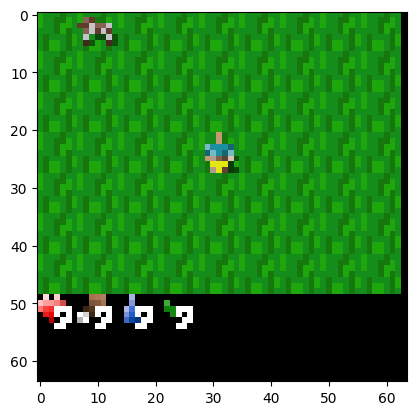

{'inventory': {'health': 9, 'food': 9, 'drink': 9, 'energy': 9, 'sapling': 0, 'wood': 0, 'stone': 0, 'coal': 0, 'iron': 0, 'diamond': 0, 'wood_pickaxe': 0, 'stone_pickaxe': 0, 'iron_pickaxe': 0, 'wood_sword': 0, 'stone_sword': 0, 'iron_sword': 0}, 'achievements': {'collect_coal': 0, 'collect_diamond': 0, 'collect_drink': 0, 'collect_iron': 0, 'collect_sapling': 0, 'collect_stone': 0, 'collect_wood': 0, 'defeat_skeleton': 0, 'defeat_zombie': 0, 'eat_cow': 0, 'eat_plant': 0, 'make_iron_pickaxe': 0, 'make_iron_sword': 0, 'make_stone_pickaxe': 0, 'make_stone_sword': 0, 'make_wood_pickaxe': 0, 'make_wood_sword': 0, 'place_furnace': 0, 'place_plant': 0, 'place_stone': 0, 'place_table': 0, 'wake_up': 0}, 'sleeping': False, 'discount': 1.0, 'semantic': array([[1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 4, 4, 3],
       ...,
       [6, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [1, 2, 6, ..., 2, 2, 2]], dtype=uint8), 'player_pos': array([32, 3

[('noop', 1.1679825e-09), ('move_left', 0.9998888), ('move_right', 4.5591846e-09), ('move_up', 1.8740468e-05), ('move_down', 9.252063e-05), ('do', 2.6316522e-09), ('sleep', 6.3553565e-11), ('place_stone', 6.5913075e-10), ('place_table', 3.87461e-09), ('place_furnace', 3.2108418e-09), ('place_plant', 1.2026593e-08), ('make_wood_pickaxe', 1.0502288e-09), ('make_stone_pickaxe', 1.106151e-08), ('make_iron_pickaxe', 1.4555279e-09), ('make_wood_sword', 1.4345481e-09), ('make_stone_sword', 4.281749e-09), ('make_iron_sword', 3.6186858e-08)]
Through another AI model, i find preferred action. check requirement and choose action base on this preferred action and your own reasoning preferred action:**move_left** with chanse 99% 



You see:
- grass 1 step to the west
- cow 3 step to the north and 3 step to the west

You face grass at your front. your facing is: south

Your status:
- health: 9/9
- food: 9/9
- drink: 9/9
- energy: 9/9

You have nothing in your inventory.
Question: What was the last action taken by the player?
Answer: The last action taken by the player was "Move West." This action was chosen based on the observation that there was grass 1 step to the west, and it was the preferred action with a 99% chance.
Question: Did the last player action succeed? If not, why?
Answer: Yes, the last player action "Move West" succeeded. The player moved to a new location where they observed grass and a cow 3 steps to the north and 3 steps to the west. There were no indications of failure or obstacles preventing the movement.
Question: List top 2 actions the player should take and the requirement for each action. Choose ONLY from the this list [ noop , move_left , move_right , move_up , move_down , do , sleep,plac

{'What was the last action taken by the player?': 'The last action taken by the player was "Move West." This action was chosen based on the observation that there was grass 1 step to the west, and it was the preferred action with a 99% chance.', 'Did the last player action succeed? If not, why?': 'Yes, the last player action "Move West" succeeded. The player moved to a new location where they observed grass and a cow 3 steps to the north and 3 steps to the west. There were no indications of failure or obstacles preventing the movement.', 'List top 2 actions the player should take and the requirement for each action. Choose ONLY from the this list [ noop , move_left , move_right , move_up , move_down , do , sleep,place_stone,place_table,place_furnace,place_plant , make_wood_pickaxe,make_stone_pickaxe , make_iron_pickaxe , make_wood_sword , make_stone_sword , make_iron_sword ] . Indicate their priority out of 5.': 'Based on the current situation and objectives, here are the top two actio

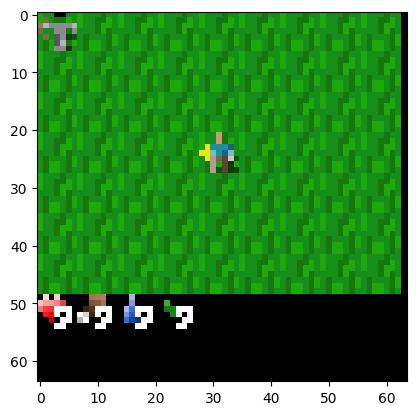

{'inventory': {'health': 9, 'food': 9, 'drink': 9, 'energy': 9, 'sapling': 0, 'wood': 0, 'stone': 0, 'coal': 0, 'iron': 0, 'diamond': 0, 'wood_pickaxe': 0, 'stone_pickaxe': 0, 'iron_pickaxe': 0, 'wood_sword': 0, 'stone_sword': 0, 'iron_sword': 0}, 'achievements': {'collect_coal': 0, 'collect_diamond': 0, 'collect_drink': 0, 'collect_iron': 0, 'collect_sapling': 0, 'collect_stone': 0, 'collect_wood': 0, 'defeat_skeleton': 0, 'defeat_zombie': 0, 'eat_cow': 0, 'eat_plant': 0, 'make_iron_pickaxe': 0, 'make_iron_sword': 0, 'make_stone_pickaxe': 0, 'make_stone_sword': 0, 'make_wood_pickaxe': 0, 'make_wood_sword': 0, 'place_furnace': 0, 'place_plant': 0, 'place_stone': 0, 'place_table': 0, 'wake_up': 0}, 'sleeping': False, 'discount': 1.0, 'semantic': array([[1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 4, 4, 3],
       ...,
       [6, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [1, 2, 6, ..., 2, 2, 2]], dtype=uint8), 'player_pos': array([31, 3

[('noop', 3.111403e-08), ('move_left', 0.97990227), ('move_right', 1.3261451e-06), ('move_up', 0.00036557458), ('move_down', 0.01972983), ('do', 1.3015702e-07), ('sleep', 9.407817e-10), ('place_stone', 1.2283295e-08), ('place_table', 1.0561598e-07), ('place_furnace', 6.845978e-08), ('place_plant', 4.915535e-08), ('make_wood_pickaxe', 1.3897019e-08), ('make_stone_pickaxe', 2.1264813e-07), ('make_iron_pickaxe', 3.5827334e-08), ('make_wood_sword', 1.2165294e-08), ('make_stone_sword', 6.646103e-08), ('make_iron_sword', 3.6024454e-07)]
Through another AI model, i find preferred action. check requirement and choose action base on this preferred action and your own reasoning preferred action:**move_left** with chanse 97% 



You took action move_left.

You see:
- grass 1 step to the west
- skeleton 3 step to the north and 4 step to the west

You face grass at your front. your facing is: west

Your status:
- health: 9/9
- food: 9/9
- drink: 9/9
- energy: 9/9

You have nothing in your inventory.
Question: What was the last action taken by the player?
Answer: The last action taken by the player was "move_left." This action was taken in Step 8, as indicated in the player's observation.
Question: Did the last player action succeed? If not, why?
Answer: Yes, the last player action "move_left" succeeded. This is evident from the change in the player's observation from Step 7 to Step 8, where the player's position shifted from facing grass in the south to facing grass in the west. The successful movement is confirmed by the description "You took action move_left." in Step 8.
Question: List top 2 actions the player should take and the requirement for each action. Choose ONLY from the this list [ noop , move_left , 

{'What was the last action taken by the player?': 'The last action taken by the player was "move_left." This action was taken in Step 8, as indicated in the player\'s observation.', 'Did the last player action succeed? If not, why?': 'Yes, the last player action "move_left" succeeded. This is evident from the change in the player\'s observation from Step 7 to Step 8, where the player\'s position shifted from facing grass in the south to facing grass in the west. The successful movement is confirmed by the description "You took action move_left." in Step 8.', 'List top 2 actions the player should take and the requirement for each action. Choose ONLY from the this list [ noop , move_left , move_right , move_up , move_down , do , sleep,place_stone,place_table,place_furnace,place_plant , make_wood_pickaxe,make_stone_pickaxe , make_iron_pickaxe , make_wood_sword , make_stone_sword , make_iron_sword ] . Indicate their priority out of 5.': "Based on the current situation and the player's obje

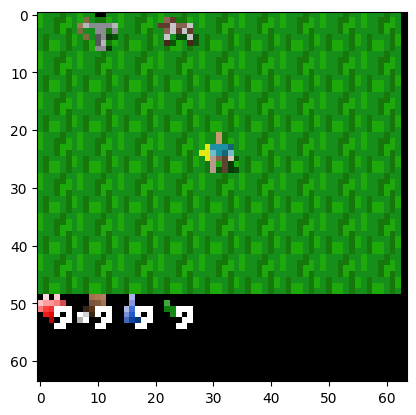

{'inventory': {'health': 9, 'food': 9, 'drink': 9, 'energy': 9, 'sapling': 0, 'wood': 0, 'stone': 0, 'coal': 0, 'iron': 0, 'diamond': 0, 'wood_pickaxe': 0, 'stone_pickaxe': 0, 'iron_pickaxe': 0, 'wood_sword': 0, 'stone_sword': 0, 'iron_sword': 0}, 'achievements': {'collect_coal': 0, 'collect_diamond': 0, 'collect_drink': 0, 'collect_iron': 0, 'collect_sapling': 0, 'collect_stone': 0, 'collect_wood': 0, 'defeat_skeleton': 0, 'defeat_zombie': 0, 'eat_cow': 0, 'eat_plant': 0, 'make_iron_pickaxe': 0, 'make_iron_sword': 0, 'make_stone_pickaxe': 0, 'make_stone_sword': 0, 'make_wood_pickaxe': 0, 'make_wood_sword': 0, 'place_furnace': 0, 'place_plant': 0, 'place_stone': 0, 'place_table': 0, 'wake_up': 0}, 'sleeping': False, 'discount': 1.0, 'semantic': array([[1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 4, 4, 3],
       ...,
       [6, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [1, 2, 6, ..., 2, 2, 2]], dtype=uint8), 'player_pos': array([30, 3

[('noop', 4.59108e-08), ('move_left', 0.80642354), ('move_right', 1.8292042e-07), ('move_up', 5.811065e-05), ('move_down', 0.19351618), ('do', 6.24129e-08), ('sleep', 2.7704576e-09), ('place_stone', 1.9509242e-08), ('place_table', 1.3208792e-07), ('place_furnace', 1.5143534e-07), ('place_plant', 4.176528e-08), ('make_wood_pickaxe', 4.8870856e-08), ('make_stone_pickaxe', 3.732669e-07), ('make_iron_pickaxe', 4.566478e-08), ('make_wood_sword', 3.3819067e-08), ('make_stone_sword', 1.6193738e-07), ('make_iron_sword', 9.781156e-07)]
Through another AI model, i find preferred action. check requirement and choose action base on this preferred action and your own reasoning preferred action:**move_left** with chanse 80% 



You took action move_left.

You see:
- grass 1 step to the west
- cow 3 step to the north and 1 step to the west
- skeleton 3 step to the north and 3 step to the west

You face grass at your front. your facing is: west

Your status:
- health: 9/9
- food: 9/9
- drink: 9/9
- energy: 9/9

You have nothing in your inventory.
Question: What was the last action taken by the player?
Answer: The last action taken by the player was "move_left." This action was taken twice, as indicated in the most recent two steps of the player's in-game observation.
Question: Did the last player action succeed? If not, why?
Answer: {"action":"noop", "probability":0 }
Question: List top 2 actions the player should take and the requirement for each action. Choose ONLY from the this list [ noop , move_left , move_right , move_up , move_down , do , sleep,place_stone,place_table,place_furnace,place_plant , make_wood_pickaxe,make_stone_pickaxe , make_iron_pickaxe , make_wood_sword , make_stone_sword , make_iron_swor

{'What was the last action taken by the player?': 'The last action taken by the player was "move_left." This action was taken twice, as indicated in the most recent two steps of the player\'s in-game observation.', 'Did the last player action succeed? If not, why?': '{"action":"noop", "probability":0 }', 'List top 2 actions the player should take and the requirement for each action. Choose ONLY from the this list [ noop , move_left , move_right , move_up , move_down , do , sleep,place_stone,place_table,place_furnace,place_plant , make_wood_pickaxe,make_stone_pickaxe , make_iron_pickaxe , make_wood_sword , make_stone_sword , make_iron_sword ] . Indicate their priority out of 5.': 'Based on the current situation and objectives, here are the top two actions the player should take:\n\n1. **Move Left (Priority: 5)**\n   - **Requirement:** Flat ground west of the agent.\n   - **Reasoning:** Moving left (west) is a strategic action to explore new areas, potentially find resources, and avoid o

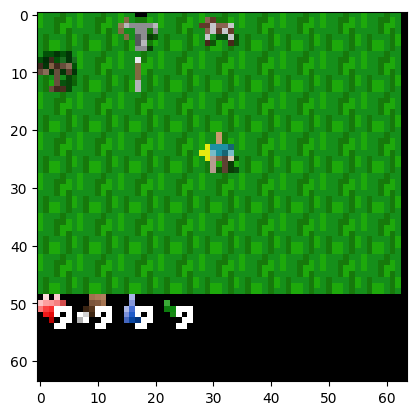

{'inventory': {'health': 9, 'food': 9, 'drink': 9, 'energy': 9, 'sapling': 0, 'wood': 0, 'stone': 0, 'coal': 0, 'iron': 0, 'diamond': 0, 'wood_pickaxe': 0, 'stone_pickaxe': 0, 'iron_pickaxe': 0, 'wood_sword': 0, 'stone_sword': 0, 'iron_sword': 0}, 'achievements': {'collect_coal': 0, 'collect_diamond': 0, 'collect_drink': 0, 'collect_iron': 0, 'collect_sapling': 0, 'collect_stone': 0, 'collect_wood': 0, 'defeat_skeleton': 0, 'defeat_zombie': 0, 'eat_cow': 0, 'eat_plant': 0, 'make_iron_pickaxe': 0, 'make_iron_sword': 0, 'make_stone_pickaxe': 0, 'make_stone_sword': 0, 'make_wood_pickaxe': 0, 'make_wood_sword': 0, 'place_furnace': 0, 'place_plant': 0, 'place_stone': 0, 'place_table': 0, 'wake_up': 0}, 'sleeping': False, 'discount': 1.0, 'semantic': array([[1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 4, 4, 3],
       ...,
       [6, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [1, 2, 6, ..., 2, 2, 2]], dtype=uint8), 'player_pos': array([29, 3

[('noop', 3.2412941e-09), ('move_left', 0.9998145), ('move_right', 8.441346e-08), ('move_up', 5.1840114e-05), ('move_down', 0.00013334514), ('do', 1.6199879e-09), ('sleep', 1.6152665e-10), ('place_stone', 1.5362156e-09), ('place_table', 6.356758e-09), ('place_furnace', 8.858676e-09), ('place_plant', 9.29852e-09), ('make_wood_pickaxe', 1.6011572e-09), ('make_stone_pickaxe', 3.081213e-08), ('make_iron_pickaxe', 4.1094323e-09), ('make_wood_sword', 1.8849409e-09), ('make_stone_sword', 8.065191e-09), ('make_iron_sword', 7.662688e-08)]
Through another AI model, i find preferred action. check requirement and choose action base on this preferred action and your own reasoning preferred action:**move_left** with chanse 99% 



You took action move_left.

You see:
- grass 1 step to the west
- tree 2 step to the north and 4 step to the west
- cow 3 step to the north
- skeleton 3 step to the north and 2 step to the west
- arrow 2 step to the north and 2 step to the west

You face grass at your front. your facing is: west

Your status:
- health: 9/9
- food: 9/9
- drink: 9/9
- energy: 9/9

You have nothing in your inventory.
Question: What was the last action taken by the player?
Answer: The last action taken by the player was "move_left." This action was taken twice, as indicated in the most recent two steps of the player's in-game observation.
Question: Did the last player action succeed? If not, why?
Answer: Yes, the last player action, "move_left," succeeded. The player's observation after taking the action indicates that they moved to a new location, as described in the environment details. There are no indications of failure or obstacles preventing the movement in the provided observations.
Question: List t

In [ ]:
###################################################
import traceback

__config = {
    "have_judgment":False,
    "have_rl":True,
    "have_llm":True,
    "llm_model":"phi"
}
seed = 8
import json
!pip install wandb
import re
import wandb
import random
wandb.login(key="wandb token")

wandb.init(project="final1", name="experiment-pure_RL1_wih_chart_with_seed_with_Phi_seed=" + str(seed))

columns=["Mode","Step", "OBS", "Score", "Reward", "model 1","model 2", "model1probability" , "model2probability", "judge"] + ["Lvl-{}: {}".format(i,q) for i, q in enumerate(globals()[f"questions_lvls_{__config['llm_model']}"])] + ["Action"]
achievements = ['collect_coal',
 'collect_diamond',
 'collect_drink',
 'collect_iron',
 'collect_sapling',
 'collect_stone',
 'collect_wood',
 'defeat_skeleton',
 'defeat_zombie',
 'eat_cow',
 'eat_plant',
 'make_iron_pickaxe',
 'make_iron_sword',
 'make_stone_pickaxe',
 'make_stone_sword',
 'make_wood_pickaxe',
 'make_wood_sword',
 'place_furnace',
 'place_plant',
 'place_stone',
 'place_table',
 'wake_up']

wandb_table = wandb.Table(columns=columns,log_mode="INCREMENTAL")
achievement_table = wandb.Table(columns=achievements,log_mode="INCREMENTAL")

from IPython.display import clear_output
actions_list = [
  "noop",
  "move_left",
  "move_right",
  "move_up",
  "move_down",
  "do",
  "sleep",
  "place_stone",
  "place_table",
  "place_furnace",
  "place_plant",
  "make_wood_pickaxe",
  "make_stone_pickaxe",
  "make_iron_pickaxe",
  "make_wood_sword",
  "make_stone_sword",
  "make_iron_sword",
]

rewardale_action = [
  "place_stone",
  "place_table",
  "place_furnace",
  "place_plant",
  "make_wood_pickaxe",
  "make_stone_pickaxe",
  "make_iron_pickaxe",
  "make_wood_sword",
  "make_stone_sword",
  "make_iron_sword"
]
action_count = {
    "move_left":0,
  "move_right":0,
  "move_up":0,
  "move_down":0,
  "do":0,
  "sleep":0,
  "place_stone":0,
  "place_table":0,
  "place_furnace":0,
  "place_plant":0,
  "make_wood_pickaxe":0,
  "make_stone_pickaxe":0,
  "make_iron_pickaxe":0,
  "make_wood_sword":0,
  "make_stone_sword":0,
  "make_iron_sword":0
}


from IPython.display import HTML, display
import matplotlib.pyplot as plt
import matplotlib

import importlib
import os
import pathlib
import sys
from functools import partial as bind

folder = pathlib.Path('/content/dreamerv3_final/dreamerv3')#.parent
sys.path.insert(0, str(folder.parent))
sys.path.insert(1, str(folder.parent.parent))
__package__ = folder.name

import elements
import embodied
import numpy as np
import portal
import ruamel.yaml as yaml




from importlib import reload
import embodied.core.driver as driver
import embodied.envs.crafter as crafter
reload(driver)


player_idx = 13

vitals = ["health","food","drink","energy",]

rot = np.array([[0,-1],[1,0]])
directions = ['front', 'right', 'back', 'left']



import pickle
import pathlib

CTXT = """
1. Overview & Primary Objective

You are an agent inside a survival-crafting game called "Crafter". Your ultimate goal is to survive, thrive, and maximize your score. The score increases by performing various advanced actions, with the highest single-point gain coming from defeating the boss enemy. Survival is your constant priority; if your health reaches zero, the game ends, and your final score is recorded.

2. Core Mechanics

Health (health): Your life points. Starts at 10. Decreases by taking damage (e.g., from enemies, starvation). If it reaches 0, you die. Restore it by eating food.

Hunger (hunger): Your satiety level. Starts at 10. Gradually decreases over time. If it reaches 0, you start taking health damage from starvation. Restore it by eating food (plant, drumstick).

Thirst (thirst): Your hydration level. Starts at 10. Gradually decreases over time. If it reaches 0, you start taking health damage from dehydration. Restore it by drinking water.

Energy (energy): Your stamina. Required to perform most actions (moving, collecting, attacking). Depletes with each action and regenerates automatically over time when not in use.

Inventory: You can carry a limited number of items. Collect resources to craft better tools and items.

Direction: Your agent faces the direction it last moved. The do action will interact with the object directly in front of you.

3. The World & Observation

The world is a 2D grid made of different tiles.

You can walk on these tiles: Grass, Sand.

You CANNOT walk on these tiles (they are obstacles): Trees, Stone nodes, Water, Coal, Iron, Diamond. You can only interact with them from an adjacent tile.
You can only see a small area around your agent. You will receive a textual or structured description of your immediate surroundings, including:

What objects and entities are nearby (e.g., tree, cow, skeleton, stone).

The items currently in your inventory.

Your current status values (health, hunger, thirst, energy).

YOUR JOB IS TO ANALYZE THIS OBSERVATION AND CHOOSE THE BEST NEXT ACTION FROM THE ALLOWED LIST.

4. Complete Action List & How to Use Them

Here is the complete list of actions you can choose from. You must choose ONE per step:

noop: Do nothing. Conserves energy. Useful for waiting while energy regenerates.

move_left, move_right, move_up, move_down: Move one cell in that direction. This also changes your facing direction. You can only move onto grass or sand tiles. You cannot move into obstacles like trees, stone, or water.

do: The primary interact action. This performs a context-sensitive action on the cell directly in front of you, based on what you are facing and what is in your inventory.

CRUCIAL RULE 1: You must be standing directly next to (adjacent to) a resource node (like a tree or stone) AND facing it for the do action to work. You interact with obstacles from the side; you cannot stand on them.

CRUCIAL RULE 2: You cannot collect resources from empty tiles like grass or sand. Using do while facing a walkable tile has no effect and wastes energy. The do action only works when facing a valid, interactable object or obstacle.

Facing a resource (tree, stone, coal, iron, plant): Collect it (e.g., get wood from a tree).

Facing an animal/monster (cow, skeleton): Attack it.

Facing a placed workbench: Opens the crafting menu, allowing you to use make_ actions.

Facing water with a bucket in inventory: Collect water.

sleep: Sleep to rapidly restore energy. Only works if your hunger and thirst are above 0. Makes you vulnerable.

place_table: Place a crafting table (workbench) on the ground in front of you, if you have one in your inventory. This is required for crafting most items. You can only place it on an empty, walkable tile (grass/sand).

place_stone: Place a stone block on the ground in front of you, if you have stone in your inventory. (Mainly for building). Placed on grass/sand.

place_furnace: Place a furnace on the ground in front of you, if you have one in your inventory. (Used for advanced smelting). Placed on grass/sand.

place_plant: Place a plant on the ground in front of you, if you have one in your inventory. (Mainly for farming). Placed on grass/sand.

make_wood_pickaxe, make_stone_pickaxe, make_iron_pickaxe: Craft better pickaxes. Requires a workbench to be placed directly in front of you and the necessary resources in your inventory.

make_wood_sword, make_stone_sword, make_iron_sword: Craft better weapons. Requires a workbench to be placed directly in front of you and the necessary resources in your inventory.

5. Resources & Items - HOW TO COLLECT

Resources are collected by moving next to them (onto an adjacent grass/sand tile), facing them, and using the do action.

wood: From trees. Move next to a tree (side tile) (cannot stand on it), face it, then use do.

stone: From stone nodes. Move next to a stone node  (side tile) (cannot stand on it), face it, then use do.

coal: From coal nodes. (Same rules as stone).

iron: From iron nodes. (Same rules as stone).

diamond: From diamond nodes (very rare). (Same rules as stone).

plant: From small plants on the ground. You can often move onto the plant's tile (as it's on grass) or stand next to it (side tile), face it, then use do.

sapling: Sometimes dropped from trees.

water: Collected from water tiles. Move next to water (cannot stand on it), face it, have a bucket in inventory, then use do.

6. Crafting & Technology Tree

Crafting is essential for progress.

First, collect wood using do on a tree.
Craft a workbench by using the place_table action (if you have one). This places it on a walkable cell (grass/sand) in front of you.
Move so that the workbench is directly in front of you.
Now you can use a make_ action (e.g., make_wood_pickaxe) to craft, provided you have the resources.

Logical Progression:
Tools: make_wood_pickaxe -> make_stone_pickaxe -> make_iron_pickaxe.
Weapons: make_wood_sword -> make_stone_sword -> make_iron_sword.

7. Enemies & Combat

Cow: Passive. Move next to it, face it, and use do to attack. Drops drumstick.

Skeleton: Hostile. Move next to it, face it, and use do to attack. Drops drumstick.

Boss (dragon): The final enemy. Requires the best gear (iron_sword). DEFEATING THE BOSS IS THE PRIMARY WAY TO ACHIEVE A HIGH SCORE.

8. Scoring System (How to Maximize Your Score)

Your score increases by achieving milestones:
+1 point: Collecting a new resource for the first time.
+1 point: Crafting a new item for the first time.
+1 point: Defeating a skeleton.
+1 point: Eating or drinking.
+1 point: Sleeping.
+1 point: Placing a workbench, furnace, etc.
+100 points: Defeating the boss (dragon).

9. Recommended Strategy for the Agent

Early Game (Survival):

Use move actions to find resources. Navigate around obstacles like trees and stone; you cannot walk through them.

Use do on plants to get food.

Use do on trees to get wood.

Find a clear spot on grass or sand and use place_table to put down a workbench.

Face the workbench and use make_wood_pickaxe.

Mid Game (Tooling Up):

Use your pickaxe to get stone and then iron more efficiently. Remember to approach nodes from the side.

Face the workbench and craft better tools and an iron_sword.

Use do on cows for better food (drumstick).

Late Game (Boss Hunt):

Prioritize finding the dragon.

Use move actions to navigate the map, going around all obstacles.

Use do while facing the dragon to attack. Ensure you have high health and the best gear first.

REMEMBER: YOU MUST MOVE TO FACE YOUR TARGET BEFORE USING DO. YOU CAN ONLY WALK ON GRASS AND SAND TILES. ANALYZE YOUR STATUS. IF HEALTH OR HUNGER IS LOW, FIND FOOD. IF YOU HAVE THE RIGHT TOOLS, PROGRESS TOWARDS THE NEXT MILESTONE.
"""




minimal_CTXT = """
Write all information helpful for the game in a numbered list.
1. Collect resources such as wood, stone, and iron to craft tools and weapons.
2. Build shelters to protect yourself from monsters at night.
3. Use tools and weapons to defend yourself against monsters.
4. Build bridges to cross lakes and rivers.
5. Dig tunnels to surprise monsters and outsmart them.
6. Plant saplings and defend them against monsters to ensure a steady food supply.
7. Eat Cow to restore health.
8. Collect Drink to restore thirst.
9. Place a Plant to eat for health.
10. Make a Wood Pickaxe to collect Stone.
11. Make a Wood Sword to defeat Zombies.
12. Make a Stone Pickaxe to collect Iron.
13. Make a Stone Sword to defeat Skeletons.
14. Place a Furnace to smelt Iron.
15. Collect Coal to smelt Iron.
16. Collect Iron to make an Iron Pickaxe and Sword.
17. Make an Iron Pickaxe to collect Diamond.
18. Make an Iron Sword to defeat Zombies and Skeletons.
19. Collect Diamond to progress further.
20. Unlock achievements to receive rewards.
21. Wake Up to start the episode.

In plain text. List all objects I need to interact/avoid to survive in the game. Use "I would like to X object Y" in each step. Replace Y by the actual object, X by the actual interaction.
I would like to avoid zombies, skeletons, and spiders.
I would like to collect saplings.
I would like to craft a wood pickaxe.
I would like to collect wood.
I would like to craft a stone pickaxe.
I would like to collect stone.
I would like to craft a furnace.
I would like to collect coal.
I would like to collect iron.
I would like to craft an iron pickaxe.
I would like to collect diamonds.
I would like to craft an iron sword.
I would like to chase cows.
I would like to grow fruits.
I would like to drink from a lake.
I would like to sleep in a safe place.
I would like to craft a table.
I would like to eat food.
I would like to drink water.
I would like to rest.
I would like to build stone tools to defend myself against monsters.
I would like to build bridges to cross lakes.
I would like to dig tunnels to hide from monsters.
I would like to block arrows with stones.
I would like to dig through walls to surprise skeletons.
I would like to seek shelter in caves.
I would like to build plantations of saplings and defend them against monsters.
I would like to eat the growing fruits to ensure a steady food supply.
I would like to place a table.
I would like to eat a cow.
I would like to place a plant.
I would like to defeat a zombie.
I would like to place stone.
I would like to eat a plant.
I would like to defeat a skeleton.
I would like to wake up.
I would like to place a furnace.

Write all game objectives numbered list. For each objective, list its requirements.
1. Collect Wood: No requirements
2. Place Table: Requires Collect Wood
3. Eat Cow: No requirements
4. Collect Sampling: No requirements
5. Collect Drink: No requirements
6. Make Wood Pickaxe: Requires Place Table
7. Make Wood Sword: Requires Place Table
8. Place Plant: Requires Collect Sampling
9. Defeat Zombie: No requirements
10. Collect Stone: Requires Make Wood Pickaxe
11. Place Stone: Requires Collect Stone
12. Eat Plant: Requires Place Plant
13. Defeat Skeleton: No requirements
14. Make Stone Pickaxe: Requires Collect Stone
15. Make Stone Sword: Requires Collect Stone
16. Wake Up: No requirements
17. Place Furnace: Requires Collect Stone
18. Collect Coal: Requires Make Wood Pickaxe
19. Collect Iron: Requires Make Stone Pickaxe
20. Make Iron Pickaxe: Requires Place Furnace, Collect Coal, and Collect Iron
21. Make Iron Sword: Requires Place Furnace, Collect Coal, and Collect Iron
22. Collect Diamond: Requires Make Iron Pickaxe



actions and requirements

1. Move West: Flat ground west of the agent.
2. Move East: Flat ground east of the agent.
3. Move North: Flat ground north of the agent.
4. Move South: Flat ground south of the agent.
5. Do: Facing creature or material; have necessary tool.
6. Sleep: Energy level is below maximum.
7. Place Stone: Stone in inventory.
8. Place Table: Wood in inventory.
9. Place Furnace: Stone in inventory.
10. Place Plant: Sapling in inventory.
11. Make Wood Pickaxe: Nearby table; wood in inventory.
12. Make Stone Pickaxe: Nearby table; wood, stone in inventory.
13. Make Iron Pickaxe: Nearby table, furnace; wood, coal, iron an inventory.
14. Make Wood Sword: Nearby table; wood in inventory.
15. Make Stone Sword: Nearby table; wood, stone in inventory.
16. Make Iron Sword: Nearby table, furnace; wood, coal, iron in inventory.
17. Noop: Always applicable.

"""


from crafter.env import Env

id_to_item = [0]*19
import itertools
dummyenv = Env()
for name, ind in itertools.chain(dummyenv._world._mat_ids.items(), dummyenv._sem_view._obj_ids.items()):
    name = str(name)[str(name).find('objects.')+len('objects.'):-2].lower() if 'objects.' in str(name) else str(name)
    id_to_item[ind] = name
player_idx = id_to_item.index('player')



def rotation_matrix(v1, v2):
    dot = np.dot(v1,v2)
    cross = np.cross(v1,v2)
    rotation_matrix = np.array([[dot, -cross],[cross, dot]])
    return rotation_matrix



def describe_loc(ref, P, noFacing=True):
    desc = []
    details = []
    if ref[1] > P[1]:
        desc.append("north")
    elif ref[1] < P[1]:
        desc.append("south")
    if ref[0] > P[0]:
        desc.append("west")
    elif ref[0] < P[0]:
        desc.append("east")

    if len(desc) == 2:
        if ref[1] > P[1]:
            details.append(f"{ref[1] - P[1]} step to the north")
        elif ref[1] < P[1]:
            details.append(f"{P[1] - ref[1]} step to the south")
        if ref[0] > P[0]:
            details.append(f"{ref[0] - P[0]} step to the west")
        elif ref[0] < P[0]:
            details.append(f"{P[0] - ref[0]} step to the east")
        pass

    elif len(desc) == 1:
        if ref[1] > P[1]:
            details.append(f"{ref[1] - P[1]} step to the north")
        elif ref[1] < P[1]:
            details.append(f"{P[1] - ref[1]} step to the south")
        if ref[0] > P[0]:
            details.append(f"{ref[0] - P[0]} step to the west")
        elif ref[0] < P[0]:
            details.append(f"{P[0] - ref[0]} step to the east")
        pass
    tmp = "-".join(desc)
    tmp2 = " and ".join(details)
    if noFacing == False:
        if "north" in tmp2:
            return "north"
        if "south" in tmp2:
            return "south"
        if "west" in tmp2:
            return "west"
        if "east" in tmp2:
            return "east"
        pass
    return tmp2


def describe_inventory(info):
    result = ""
    status_str = "Your status:\n{}".format("\n".join(["- {}: {}/9".format(v, info['inventory'][v]) for v in vitals]))
    result += status_str + "\n\n"
    inventory_str = "\n".join(["- {}: {}".format(i, num) for i,num in info['inventory'].items() if i not in vitals and num!=0])
    inventory_str = "Your inventory:\n{}".format(inventory_str) if inventory_str else "You have nothing in your inventory."
    result += inventory_str #+ "\n\n"
    return result.strip()



def rotation_matrix(v1, v2):
    dot = np.dot(v1,v2)
    cross = np.cross(v1,v2)
    rotation_matrix = np.array([[dot, -cross],[cross, dot]])
    return rotation_matrix

def describe_loc(ref, P, noFacing=True):
    desc = []
    details = []
    if ref[1] > P[1]:
        desc.append("north")
    elif ref[1] < P[1]:
        desc.append("south")
    if ref[0] > P[0]:
        desc.append("west")
    elif ref[0] < P[0]:
        desc.append("east")

    if len(desc) == 2:
        if ref[1] > P[1]:
            details.append(f"{ref[1] - P[1]} step to the north")
        elif ref[1] < P[1]:
            details.append(f"{P[1] - ref[1]} step to the south")
        if ref[0] > P[0]:
            details.append(f"{ref[0] - P[0]} step to the west")
        elif ref[0] < P[0]:
            details.append(f"{P[0] - ref[0]} step to the east")
        pass

    elif len(desc) == 1:
        if ref[1] > P[1]:
            details.append(f"{ref[1] - P[1]} step to the north")
        elif ref[1] < P[1]:
            details.append(f"{P[1] - ref[1]} step to the south")
        if ref[0] > P[0]:
            details.append(f"{ref[0] - P[0]} step to the west")
        elif ref[0] < P[0]:
            details.append(f"{P[0] - ref[0]} step to the east")
        pass


    tmp = "-".join(desc)
    tmp2 = " and ".join(details)

    if noFacing == False:
        if "north" in tmp2:
            return "north"
        if "south" in tmp2:
            return "south"
        if "west" in tmp2:
            return "west"
        if "east" in tmp2:
            return "east"
        pass
    return tmp2


def describe_env(info):
    assert(info['semantic'][info['player_pos'][0],info['player_pos'][1]] == player_idx)
    semantic = info['semantic'][info['player_pos'][0]-info['view'][0]//2:info['player_pos'][0]+info['view'][0]//2+1, info['player_pos'][1]-info['view'][1]//2+1:info['player_pos'][1]+info['view'][1]//2]
    center = np.array([info['view'][0]//2,info['view'][1]//2-1])
    result = ""
    x = np.arange(semantic.shape[1])
    y = np.arange(semantic.shape[0])
    x1, y1 = np.meshgrid(x,y)
    loc = np.stack((y1, x1),axis=-1)
    dist = np.absolute(center-loc).sum(axis=-1)
    obj_info_list = []

    facing = info['player_facing']
    target = (center[0] + facing[0], center[1] + facing[1])
    target = id_to_item[semantic[target]]
    obs = "You face {} at your front. your facing is: {}".format(target, describe_loc(np.array([0,0]),facing, False))


    #print(loc)

    for idx in np.unique(semantic):
        if idx==player_idx:
            continue

        smallest = np.unravel_index(np.argmin(np.where(semantic==idx, dist, np.inf)), semantic.shape)
        obj_info_list.append((id_to_item[idx], dist[smallest], describe_loc(np.array([0,0]), smallest-center) ) )

    if len(obj_info_list)>0:
        status_str = "You see:\n{}".format("\n".join(["- {} {}".format(name, loc) for name, dist, loc in obj_info_list]))
    else:
        status_str = "You see nothing away from you."
    result += status_str + "\n\n"
    result += obs.strip()

    return result.strip()


def describe_act(info):
    result = ""

    # action_str = info['action'].replace('do_', 'interact_')
    # action_str = action_str.replace('move_up', 'move_north')
    # action_str = action_str.replace('move_down', 'move_south')
    # action_str = action_str.replace('move_left', 'move_west')
    # action_str = action_str.replace('move_right', 'move_east')
    action_str = info['action']
    act = "You took action {}.".format(action_str)
    result+= act

    return result.strip()


def describe_status(info):
    if info['sleeping']:
        return "You are sleeping, and will not be able take actions until energy is full.\n\n"
    elif info['dead']:
        return "You died.\n\n"
    else:
        return ""


def describe_frame(info, action):
    try:
        ######################################
        result = ""
        if action is not None:
            result+=describe_act({
                "action":action})
        result+=describe_status(info)
        result+="\n\n"
        result+=describe_env(info)
        result+="\n\n"
        result+=describe_inventory(info)
        # if action not None:
        #     result += f"previos action is {action}"
        return result.strip()
    except Exception as e:
        print(e)
        return "Error, you are out of the map."



current_info = None
sumRewards = 0
def infoCallback(args):
  global current_info
  current_info = args;




import json
_index = 0
trajectories = []
latestaction=None
def actionModify(args):
  global wandb_table
  global achievement_table
  global latestaction
  # Simulate training loop
  global _index
  _res = None
  _index = _index + 1
  if _index % 40 == 0:
      clear_output()

  global sumRewards
  if (current_info == None) or (not current_info):
      display(HTML('<h1> Wh have not any map yet </h1>'))
      args['action'] = np.array([0], dtype=np.int32)
      if '_probs' in args:
          del args['_probs']
      if '_mobs' in args:
          del args['_mobs']
      return args

  if current_info['dead']:

      wandb.finish()
      sys.exit();

  if '_mobs' in args:
      if 'image' in args['_mobs']:
          plt.imshow(args['_mobs']['image'][0])
          plt.show()

  display(HTML('<h1> New Step </h1>'))
  sumRewards = sumRewards + current_info['reward']
  display(HTML(f"<h2> Latest Reward =>>>>>>>>>>> {sumRewards}</h2>"))

  display(HTML('<h2> Current info =>>>>>>>>>>> </h2>'))
  print(current_info)


  mtext = '';
  if '_probs' in args:
    display(HTML('<h2> Actions probablilites =>>>>>>>>>>> </h2>'))
    print(args['_probs'])
    top_action = sorted(args['_probs'], key=lambda x: x[1], reverse=True)[:1]
    # mtext = 'Through another AI model, I have generated a list of the 5 actions with the highest probability of success. Refer to this list and check requirment for each one and then the selected actions when answering the questions. action list: \n'
     # Check the requirements for this action and if it is feasible, declare it as the preferred action. If it is not feasible, choose another action based on your reasoning.
    mtext = 'Through another AI model, i find preferred action. check requirement and choose action base on this preferred action and your own reasoning preferred action:'
#mtext = """I have found a preferred action with the highest certainty.
#Preferred Action: """
    for action, prob in top_action:
      mtext = mtext + f"**{action}** with chanse {int(prob*100)}% \n"
      #mtext = mtext + f"preferred action: **{action}** \n"
    # mtext = '\n' + mtext + f"check requirements with **precision and choose {action} if requirements meet"

  print(mtext)
  description = describe_frame(current_info,latestaction)
  trajectories.append((_index, description))

  display(HTML('<h2> Discription =>>>>>>>>>>>>>>>>>>>>>> </h2>'))
  print(description)

  if _index < 20 and 1==3:
      # print(top_5_actions)
      # print('sehse')
      args['action'] = np.array([
          actions_list.index(
            top_action[0][0].lower().replace(' ','_').replace('*','').replace('*','').replace('*','')
            # list(results.items())[-1][1]
        )
      ], dtype=np.int32)
      display(HTML('<h2> Final action decition =>>>>>>>>>>>>>>>>> </h2>'))
      print(
      top_action[0][0].lower().replace(' ','_').replace('*','').replace('*','').replace('*','')
      )

      # wandb.log({
      #       "mindex": _index,
      #       "action": args['action'][0],
      #       #"accuracy": epoch/2,
      #       #"learning_rate": 0.001
      #   })




  else:


      results = None
      if __config["have_llm"]:
          func_name = f'topological_traverse_{__config["llm_model"]}'

          if __config["have_rl"]:
              results = globals()[func_name](minimal_CTXT,
                                             "\n".join(["Player Observation Step {}:\n{}".format(i+i,d) for i, d in trajectories[-2:]])
                                             , question_dependencies, mtext)
          else:
              results = globals()[func_name](minimal_CTXT,
                                             "\n".join(["Player Observation Step {}:\n{}".format(i+i,d) for i, d in trajectories[-2:]])
                                             , question_dependencies, "")

          display(HTML('<h2> Answers from LLM =>>>>>>>>>>>>> </h2>'))
          print(results)

          try:
              match = re.search(r'\{.*\}',
                               str(results[
                            q_act
                          ]).replace(' ', '').replace('\n', '').replace('*', '')
                               )

              if match:
                  json_substring = match.group()
                  _res = json.loads(json_substring)
                  if type(_res['probability']) == str:
                      _res['probability'] = float(_res['probability'])
                  if _res['probability'] > top_action[0][1]:
                      if _res['action'].lower().replace(' ','_').replace('*','').replace('*','').replace('*','') in actions_list:
                          args['action'] = np.array([
                              actions_list.index(
                                _res['action'].lower().replace(' ','_').replace('*','').replace('*','').replace('*','')
                            )
                          ], dtype=np.int32)
                          model2_action = _res['action'].lower().replace(' ','_').replace('*','').replace('*','').replace('*','')
                          _res = {
                              "probability": _res['probability'],
                              "action": _res['action'].lower().replace(' ','_').replace('*','').replace('*','').replace('*','')
                          }
                      else:
                          print("errror in action detection")
                          _res = {
                           "probability": 0,
                              "action": "noop"
                          }
                          args['action'] = np.array([
                              actions_list.index(
                                #'noop'
                                  top_action[0][0]
                                # list(results.items())[-1][1]
                            )
                          ], dtype=np.int32)
                          model2_action = "noop"




                  else:
                      args['action'] = np.array([
                          actions_list.index(
                            top_action[0][0].lower().replace(' ','_').replace('*','').replace('*','').replace('*','')
                            # list(results.items())[-1][1]
                        )
                      ], dtype=np.int32)
                      model2_action = _res['action'].lower().replace(' ','_').replace('*','').replace('*','').replace('*','')
                      _res = {
                              "probability": _res['probability'],
                              "action": _res['action'].lower().replace(' ','_').replace('*','').replace('*','').replace('*','')
                      }

              else:
                  raise "invalid json";
                  pass




          except Exception as e:
              print("errror in json detection")
              print(e)
              traceback.print_exc()
              _res = {
               "probability": 0,
                "action": "noop"
              }
              args['action'] = np.array([
                  actions_list.index(
                    #'noop'
                      top_action[0][0]
                    # list(results.items())[-1][1]
                )
              ], dtype=np.int32)
              model2_action = "noop"
              pass





          # sys.exit();
          # display(HTML('<h2> Final action decition =>>>>>>>>>>>>>>>>> </h2>'))
          # print(
          #     results[
          #         q_act
          #     ].lower().replace(' ','_').replace('*','').replace('*','').replace('*','')
          # )
          # if results[
          #     q_act
          #     ].lower().replace(' ','_').replace('*','').replace('*','').replace('*','') in actions_list:

          #     args['action'] = np.array([
          #         actions_list.index(
          #           results[
          #               q_act
          #             ].lower().replace(' ','_').replace('*','').replace('*','').replace('*','')
          #           # list(results.items())[-1][1]
          #       )
          #     ], dtype=np.int32)
          #     pass
          # else:
          #     print("errror in action detection")
          #     args['action'] = np.array([
          #         actions_list.index(
          #           'noop'
          #           # list(results.items())[-1][1]
          #       )
          #     ], dtype=np.int32)
          #     pass
      else:
          pass


  # model2_action = actions_list[args['action'][0]]
  model1_action = top_action[0][0].lower().replace(' ','_').replace('*','').replace('*','').replace('*','')

  # if model1_action in rewardale_action and action_count[model1_action] == 0:
  #     print('veto action')
  #     model2_action = model1_action
  #     pass
  print(f"model1 action: {model1_action}    model2 action: {model2_action}")
  # print(model1_action)
  # print(model2_action)
  if model2_action == model1_action:
      print("select without judge")
  else:
       # __config = {
  #   "have_judgment":True,
  #   "have_rl":True
      #   "have_llm":True
  #   "llm_model":"llama"
  # }
      if __config["have_judgment"]:
          final_res = get_inference2(compose_prompt2(minimal_CTXT, description, '', '', '', selected_actions=[model1_action,model2_action]))
          print(final_res)
          args['action'] = np.array([
                  actions_list.index(
                    final_res.lower().replace(' ','_').replace('*','').replace('*','').replace('*','')
                    # list(results.items())[-1][1]
                )
        ], dtype=np.int32)
      else:
          pass


  #action_count[actions_list[args['action'][0]]] += 1


# columns=["Mode","Step", "OBS", "Score", "Reward", "model 1","model 2", "judge"]

  new_row = [
      json.dumps(__config),
      _index,description , sumRewards, current_info['reward'], model1_action , model2_action,
      top_action[0][1],
      _res['probability'],
       actions_list[args['action'][0]]
            ]
  a_row = [0] * len(globals()[f"questions_lvls_{__config['llm_model']}"])

  if results:
      pass
      for (q,a) in results.items():
        a_row[globals()[f"questions_lvls_{__config['llm_model']}"].index(q)] = a
        if q == q_act:
            answer_act = a

  new_row = new_row + a_row
  new_row.append(actions_list[args['action'][0]])
  achievement_table.add_data(*[current_info['achievements'][k] for k in achievements])
  print(new_row)
  print([current_info['achievements'][k] for k in achievements])
  wandb_table.add_data(*new_row)
  wandb.log({"predictions_table1": achievement_table})
  wandb.log({"predictions_table2": wandb_table})
  wandb.log({"reward": current_info['reward'], "total reward": sumRewards})
  print("submit")
  latestaction = actions_list[args['action'][0]]



  if '_probs' in args:
      del args['_probs']
  if '_mobs' in args:
      del args['_mobs']
  return args

print(driver.Driver.set_callback(actionModify))
print(crafter.Crafter.set_info_func(infoCallback))





def main(argv=None):
  from .agent import Agent
  [elements.print(line) for line in Agent.banner]
  configs = elements.Path(folder / 'configs2.yaml').read()
  configs = yaml.YAML(typ='safe').load(configs)
  parsed, other = elements.Flags(configs=['defaults']).parse_known(argv)
  config = elements.Config(configs['defaults'])
  config = config.update(seed=seed)
  config = config.update(logdir='/content/')
  config = config.update({'run.from_checkpoint': '/content'})
  print(config)
  for name in ['crafter']: #parsed.configs:
    config = config.update(configs[name])
  #config = elements.Flags(config).parse(other)
  config = config.update(logdir=(
      config.logdir.format(timestamp=elements.timestamp())))

  #configs['task']['task'] = 'crafter'
  if 'JOB_COMPLETION_INDEX' in os.environ:
    config = config.update(replica=int(os.environ['JOB_COMPLETION_INDEX']))
  print('Replica:', config.replica, '/', config.replicas)

  logdir = elements.Path(config.logdir)
  print('Logdir:', logdir)
  print('Run script:', config.script)
  if not config.script.endswith(('_env', '_replay')):
    logdir.mkdir()
    config.save(logdir / 'config2.yaml')

  def init():
    elements.timer.global_timer.enabled = config.logger.timer

  portal.setup(
      errfile=config.errfile and logdir / 'error',
      clientkw=dict(logging_color='cyan'),
      serverkw=dict(logging_color='cyan'),
      initfns=[init],
      ipv6=config.ipv6,
  )

  args = elements.Config(
      **config.run,
      replica=config.replica,
      replicas=config.replicas,
      logdir=config.logdir,
      batch_size=config.batch_size,
      batch_length=config.batch_length,
      report_length=config.report_length,
      consec_train=config.consec_train,
      consec_report=config.consec_report,
      replay_context=config.replay_context,
  )

  if config.script == 'train':
    embodied.run.train(
        bind(make_agent, config),
        bind(make_replay, config, 'replay'),
        bind(make_env, config),
        bind(make_stream, config),
        bind(make_logger, config),
        args)

  elif config.script == 'train_eval':
    embodied.run.train_eval(
        bind(make_agent, config),
        bind(make_replay, config, 'replay'),
        bind(make_replay, config, 'eval_replay', 'eval'),
        bind(make_env, config),
        bind(make_env, config),
        bind(make_stream, config),
        bind(make_logger, config),
        args)

  elif config.script == 'eval_only':
      #print("sesejsejse")
      #print(config)
      #config.update(logdir='/kaggle/working')
      #config.update(run.from_checkpoint='/kaggle/working')
      # config.run.from_checkpoint = '/kaggle/working'
      embodied.run.eval_only(
        bind(make_agent, config),
        bind(make_env, config),
        bind(make_logger, config),
        args)

  elif config.script == 'parallel':
    embodied.run.parallel.combined(
        bind(make_agent, config),
        bind(make_replay, config, 'replay'),
        bind(make_replay, config, 'replay_eval', 'eval'),
        bind(make_env, config),
        bind(make_env, config),
        bind(make_stream, config),
        bind(make_logger, config),
        args)

  elif config.script == 'parallel_env':
    is_eval = config.replica >= args.envs
    embodied.run.parallel.parallel_env(
        bind(make_env, config), config.replica, args, is_eval)

  elif config.script == 'parallel_envs':
    is_eval = config.replica >= args.envs
    embodied.run.parallel.parallel_envs(
        bind(make_env, config), bind(make_env, config), args)

  elif config.script == 'parallel_replay':
    embodied.run.parallel.parallel_replay(
        bind(make_replay, config, 'replay'),
        bind(make_replay, config, 'replay_eval', 'eval'),
        bind(make_stream, config),
        args)

  else:
    raise NotImplementedError(config.script)


def make_agent(config):
  from .agent import Agent
  env = make_env(config, 0)
  notlog = lambda k: not k.startswith('log/')
  obs_space = {k: v for k, v in env.obs_space.items() if notlog(k)}
  act_space = {k: v for k, v in env.act_space.items() if k != 'reset'}
  env.close()
  if config.random_agent:
    return embodied.RandomAgent(obs_space, act_space)
  cpdir = elements.Path(config.logdir)
  cpdir = cpdir.parent if config.replicas > 1 else cpdir
  return Agent(obs_space, act_space, elements.Config(
      **config.agent,
      logdir=config.logdir,
      seed=config.seed,
      jax=config.jax,
      batch_size=config.batch_size,
      batch_length=config.batch_length,
      replay_context=config.replay_context,
      report_length=config.report_length,
      replica=config.replica,
      replicas=config.replicas,
  ))


def make_logger(config):
  step = elements.Counter()
  logdir = config.logdir
  multiplier = config.env.get(config.task.split('_')[0], {}).get('repeat', 1)
  outputs = []
  outputs.append(elements.logger.TerminalOutput(config.logger.filter, 'Agent'))
  for output in config.logger.outputs:
    if output == 'jsonl':
      outputs.append(elements.logger.JSONLOutput(logdir, 'metrics.jsonl'))
      outputs.append(elements.logger.JSONLOutput(
          logdir, 'scores.jsonl', 'episode/score'))
    elif output == 'tensorboard':
      outputs.append(elements.logger.TensorBoardOutput(
          logdir, config.logger.fps))
    elif output == 'expa':
      exp = logdir.split('/')[-4]
      run = '/'.join(logdir.split('/')[-3:])
      proj = 'embodied' if logdir.startswith(('/cns/', 'gs://')) else 'debug'
      outputs.append(elements.logger.ExpaOutput(
          exp, run, proj, config.logger.user, config.flat))
    elif output == 'wandb':
      name = '/'.join(logdir.split('/')[-4:])
      outputs.append(elements.logger.WandBOutput(name))
    elif output == 'scope':
      outputs.append(elements.logger.ScopeOutput(elements.Path(logdir)))
    else:
      raise NotImplementedError(output)
  logger = elements.Logger(step, outputs, multiplier)
  return logger


def make_replay(config, folder, mode='train'):
  batlen = config.batch_length if mode == 'train' else config.report_length
  consec = config.consec_train if mode == 'train' else config.consec_report
  capacity = config.replay.size if mode == 'train' else config.replay.size / 10
  length = consec * batlen + config.replay_context
  assert config.batch_size * length <= capacity

  directory = elements.Path(config.logdir) / folder
  if config.replicas > 1:
    directory /= f'{config.replica:05}'
  kwargs = dict(
      length=length, capacity=int(capacity), online=config.replay.online,
      chunksize=config.replay.chunksize, directory=directory)

  if config.replay.fracs.uniform < 1 and mode == 'train':
    assert config.jax.compute_dtype in ('bfloat16', 'float32'), (
        'Gradient scaling for low-precision training can produce invalid loss '
        'outputs that are incompatible with prioritized replay.')
    recency = 1.0 / np.arange(1, capacity + 1) ** config.replay.recexp
    selectors = embodied.replay.selectors
    kwargs['selector'] = selectors.Mixture(dict(
        uniform=selectors.Uniform(),
        priority=selectors.Prioritized(**config.replay.prio),
        recency=selectors.Recency(recency),
    ), config.replay.fracs)

  return embodied.replay.Replay(**kwargs)


def make_env(config, index, **overrides):
  suite, task = config.task.split('_', 1)
  if suite == 'memmaze':
    from embodied.envs import from_gym
    import memory_maze  # noqa
  ctor = {
      'dummy': 'embodied.envs.dummy:Dummy',
      'gym': 'embodied.envs.from_gym:FromGym',
      'dm': 'embodied.envs.from_dmenv:FromDM',
      'crafter': 'embodied.envs.crafter:Crafter',
      'dmc': 'embodied.envs.dmc:DMC',
      'atari': 'embodied.envs.atari:Atari',
      'atari100k': 'embodied.envs.atari:Atari',
      'dmlab': 'embodied.envs.dmlab:DMLab',
      'minecraft': 'embodied.envs.minecraft:Minecraft',
      'loconav': 'embodied.envs.loconav:LocoNav',
      'pinpad': 'embodied.envs.pinpad:PinPad',
      'langroom': 'embodied.envs.langroom:LangRoom',
      'procgen': 'embodied.envs.procgen:ProcGen',
      'bsuite': 'embodied.envs.bsuite:BSuite',
      'memmaze': lambda task, **kw: from_gym.FromGym(
          f'MemoryMaze-{task}-v0', **kw),
  }[suite]
  if isinstance(ctor, str):
    module, cls = ctor.split(':')
    module = importlib.import_module(module)
    ctor = getattr(module, cls)
  kwargs = config.env.get(suite, {})
  kwargs.update(overrides)
  if kwargs.pop('use_seed', False):
    kwargs['seed'] = hash((config.seed, index)) % (2 ** 32 - 1)
  if kwargs.pop('use_logdir', False):
    kwargs['logdir'] = elements.Path(config.logdir) / f'env{index}'
  env = ctor(task, **kwargs)
  return wrap_env(env, config)


def wrap_env(env, config):
  for name, space in env.act_space.items():
    if not space.discrete:
      env = embodied.wrappers.NormalizeAction(env, name)
  env = embodied.wrappers.UnifyDtypes(env)
  env = embodied.wrappers.CheckSpaces(env)
  for name, space in env.act_space.items():
    if not space.discrete:
      env = embodied.wrappers.ClipAction(env, name)
  return env


def make_stream(config, replay, mode):
  fn = bind(replay.sample, config.batch_size, mode)
  stream = embodied.streams.Stateless(fn)
  stream = embodied.streams.Consec(
      stream,
      length=config.batch_length if mode == 'train' else config.report_length,
      consec=config.consec_train if mode == 'train' else config.consec_report,
      prefix=config.replay_context,
      strict=(mode == 'train'),
      contiguous=True)

  return stream


if __name__ == '__main__':
  main()

##############